In [ ]:
!unzip '/content/drive/MyDrive/Personal_Project/Quora_DataSets/train.csv.zip'

y
Archive:  /content/drive/MyDrive/Personal_Project/Quora_DataSets/train.csv.zip
  inflating: train.csv               


In [ ]:
data = os.listdir(path)

In [ ]:
data

['train.csv', 'Val.csv', 'test.csv', '.ipynb_checkpoints']

# **DataSets**

In [ ]:
# installing extra packages
!pip install distance
!pip install fuzzywuzzy

     |████████████████████████████████| 180 kB 4.7 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16276 sha256=247d5ac4692e785fc34ea3c7f20e3ffa156228ec02b5049f42434ce10f91ce43
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import os
from nltk.corpus import stopwords
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
train_data = pd.read_csv(path + '/' + data[0])
train_data.shape

(404290, 6)

In [ ]:
train_data.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
286848,286848,407511,262472,What is the best strategy for getting 3 stars ...,Clash of Clans: Which is best war base for tow...,0
233619,233619,257212,317898,Would there still be web hosting without net n...,Could people still make a website without net ...,1
232584,232584,342627,342628,How do politicians get decent sleep in the mid...,How do I go back to sleep after waking up?,0
227427,227427,336272,27805,"Why, in India, is there a big difference in PC...",Why are console games more expensive than PC v...,0
88427,88427,148729,148730,Am I too old to start learning how to program ...,"I am 29, I want to learn programming, Is it to...",1
330344,330344,457096,457097,What are the best car batteries in Canada?,What is the best car battery?,0
241851,241851,19273,92435,How can I be a good software engineer?,What should I learn to be a software engineer?,1
82201,82201,74089,44868,Can I make an Android app with Python?,How do I make an Android app with Python? I wa...,1
229543,229543,338866,338867,How do I remove anundoram borooah award logo f...,How do designers create a logo from scratch?,0
273517,273517,391988,373992,Can multiple individual viruses infect one cell?,Could a virus infect a virus/other harmful for...,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# missing values
train_data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
train_data[train_data.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [ ]:
train_data = train_data.dropna()
train_data.shape

(404287, 6)

In [ ]:
# duplicate rows
train_data.duplicated().sum()

0

0    255024
1    149263
Name: is_duplicate, dtype: int64

-------------------------------------------
Lets see in Percentage
-------------------------------------------

0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64



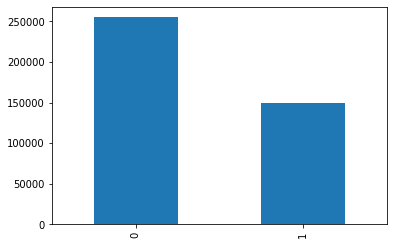

In [ ]:
# Distribution of duplicate and non-duplicate questions

print(train_data['is_duplicate'].value_counts())
print()
print('-------------------------------------------')
print('Lets see in Percentage')
print('-------------------------------------------')
print()
print((train_data['is_duplicate'].value_counts()/train_data['is_duplicate'].count())*100)
print()
train_data['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
qids = pd.Series(train_data.qid2.tolist() + train_data.qid1.tolist())
uniq = len(np.unique(qids))
print('Total number of unique questions is {}'.format(uniq))
#Number of questions that repeated than 1 time
cnt = qids.value_counts()
more1 = len(cnt[cnt.values > 1])
print('Number of questions that repeated more than 1 time is {} which is {}%'.format(more1,(more1/(len(cnt))*100)))
print('The maximum number of times a question occured is {}'.format(max(cnt)))

Total number of unique questions is 537929
Number of questions that repeated more than 1 time is 111778 which is 20.779322178205675%
The maximum number of times a question occured is 157


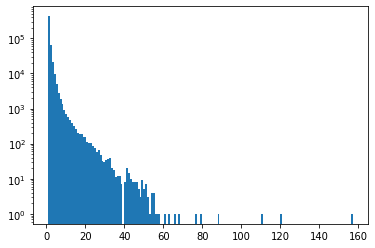

In [ ]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()